**MLR linear-linear base model:**

with all numeric and categorical features and no transformations.  

In [2]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

# Import raw data, if needed for comparison.
ames_raw = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0).reset_index()
ames_raw.drop(columns=['index'], inplace=True)
ames_raw.head(2)

# Import cleaned data for modeling
ames = pd.read_pickle('ames_clean.pkl')

In [3]:
# define numerical features
numerical_features = ames.select_dtypes(include=['float64', 'int64'])

# drop target from features
numerical_features.drop(columns=['SalePrice'], axis=1, inplace=True)

# define numerical features list
numerical_features_list = numerical_features.columns

# print number of numerical features and head of df
print(f'number of numerical features (without target): {len(numerical_features_list)}')
numerical_features.head(2)

number of numerical features (without target): 31


,GrLivArea,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,856,68.0,7890,1939,1950,0.0,238.0,0.0,618.0,856.0,...,1939,2.0,399.0,0,0,0,0,166,0,0
1,1049,42.0,4235,1984,1984,149.0,552.0,393.0,104.0,1049.0,...,1984,1.0,266.0,0,105,0,0,0,0,0


In [4]:
# define categorical features
categorical_features = ames.select_dtypes(include=['object'])

# define categorical features list
categorical_features_list = categorical_features.columns

# print number of categorical features and head of df
print(f'number of categorical features: {len(categorical_features_list)}')
categorical_features.head(2)

number of categorical features: 48


,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,30,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,SWISU,...,TA,TA,Y,None,None,None,3,2010,WD,Normal
1,120,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,...,TA,TA,Y,None,None,None,2,2009,WD,Normal


In [5]:
# define features for modeling
X = numerical_features.join(categorical_features)
y = ames['SalePrice']
X.head(2)

,GrLivArea,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,856,68.0,7890,1939,1950,0.0,238.0,0.0,618.0,856.0,...,TA,TA,Y,None,None,None,3,2010,WD,Normal
1,1049,42.0,4235,1984,1984,149.0,552.0,393.0,104.0,1049.0,...,TA,TA,Y,None,None,None,2,2009,WD,Normal


In [6]:
# Set up preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', 'passthrough', numerical_features_list),
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features_list)
])

In [7]:
# fit the model
model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])

**Penalized and tree models use GridSearchCV and evaluate on train-test data. How to score here for fair comparison?**

Because I am using GridSearchCV for hyperparameter tuning with my penalized and tree models, use cross validation scoring here as well and evaluate on train test data, for fair comparison.

In [9]:
# create storage
results = {}

# fit and evaluate the model on all data and score
model.fit(X, y)
cv_scores = cross_val_score(model, X, y)
mean_cv_score = float(round(cv_scores.mean(), 4))

# evaluate on train-test for overfitting analysis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

model.fit(X_train, y_train)
train_score = (cross_val_score(model, X_train, y_train)).mean()
test_score = (cross_val_score(model, X_test, y_test)).mean()
diff = train_score - test_score

results = {
    'mean-cv on X and y': round(mean_cv_score, 4),
    
    'train score': round(train_score, 4),
    'test score': round(test_score, 4),
    'train-test gap': round(diff, 4),
    'scenario': 'linear-linear base model (79 features)',
    'algorithm': 'MLR'
}

print(f'cv scores', cv_scores)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [18, 33, 34] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [17, 30, 43, 46] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [9, 17, 18, 19] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 22] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/prepr

cv scores [0.86743571 0.92265047 0.93065861 0.92360722 0.92584001]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 11, 29, 38, 41, 42, 46] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [13, 16, 17, 18, 19, 47] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [17, 24, 32, 38, 39, 46] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 22] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [10]:
results 

{'mean-cv on X and y': 0.914,
 'train score': 0.8892,
 'test score': 0.8964,
 'train-test gap': -0.0072,
 'scenario': 'linear-linear base model (79 features)',
 'algorithm': 'MLR'}

In [11]:
results_df = pd.DataFrame([results])
results_df

,mean-cv on X and y,train score,test score,train-test gap,scenario,algorithm
0,0.914,0.8892,0.8964,-0.0072,linear-linear base model (79 features),MLR


In [12]:
results_df.to_csv('linear_linear_base.csv')

# example cv-fold analysis:

In [32]:
cv_scores

array([0.86743571, 0.92265047, 0.93065861, 0.92360722, 0.92584001])

In [35]:
import numpy as np
import scipy.stats as stats
from scipy.stats import bootstrap
import matplotlib.pyplot as plt

# 1. Basic Statistics
print("1. BASIC STATISTICS:")
print(f"Mean CV Score: {np.mean(cv_scores):.6f}")
print(f"Standard Deviation: {np.std(cv_scores, ddof=1):.6f}")
print(f"Standard Error: {stats.sem(cv_scores):.6f}")
print(f"Coefficient of Variation: {(np.std(cv_scores, ddof=1)/np.mean(cv_scores)*100):.2f}%")
print()

1. BASIC STATISTICS:
Mean CV Score: 0.914038
Standard Deviation: 0.026235
Standard Error: 0.011733
Coefficient of Variation: 2.87%



In [41]:
# 2. Confidence Intervals
print("2. CONFIDENCE INTERVALS:")
# 95% CI using t-distribution (appropriate for small sample)
confidence_level = 0.95
alpha = 1 - confidence_level
df = len(cv_scores) - 1
t_critical = stats.t.ppf(1 - alpha/2, df)
margin_error = t_critical * stats.sem(cv_scores)

ci_lower = np.mean(cv_scores) - margin_error
ci_upper = np.mean(cv_scores) + margin_error
print(f"95% Confidence Interval: [{ci_lower:.6f}, {ci_upper:.6f}]")

# Bootstrap CI for comparison
def bootstrap_mean(data):
    return np.mean(data)

bootstrap_ci = bootstrap((cv_scores,), bootstrap_mean, n_resamples=10000, 
                        confidence_level=0.95, random_state=42)
print(f"Bootstrap 95% CI: [{bootstrap_ci.confidence_interval.low:.6f}, {bootstrap_ci.confidence_interval.high:.6f}]")
print()

2. CONFIDENCE INTERVALS:
95% Confidence Interval: [0.881464, 0.946613]
Bootstrap 95% CI: [0.879117, 0.926804]



In [47]:
# 3. Distribution Analysis
print("3. DISTRIBUTION ANALYSIS:")
print(f"Minimum Score (Worst-case): {np.min(cv_scores):.6f}")
print(f"Maximum Score (Best-case): {np.max(cv_scores):.6f}")
print(f"Range: {np.max(cv_scores) - np.min(cv_scores):.6f}")
print(f"Median: {np.median(cv_scores):.6f}")

# Skewness and Kurtosis
skewness = stats.skew(cv_scores)
kurtosis = stats.kurtosis(cv_scores)
print(f"Skewness: {skewness:.4f} ({'right-skewed' if skewness > 0 else 'left-skewed' if skewness < 0 else 'symmetric'})")
print(f"Kurtosis: {kurtosis:.4f} ({'heavy-tailed' if kurtosis > 0 else 'light-tailed' if kurtosis < 0 else 'normal-tailed'})")
print()

3. DISTRIBUTION ANALYSIS:
Minimum Score (Worst-case): 0.867436
Maximum Score (Best-case): 0.930659
Range: 0.063223
Median: 0.923607
Skewness: -1.4468 (left-skewed)
Kurtosis: 0.1839 (heavy-tailed)



In [45]:
# 4. Risk Assessment
print("4. RISK ASSESSMENT:")
mean_score = np.mean(cv_scores)
threshold = 0.90  # Example acceptable threshold

print(f"Performance below threshold ({threshold}): {np.sum(cv_scores < threshold)}/5 folds")
print(f"Probability of score < {threshold}: {np.mean(cv_scores < threshold)*100:.1f}%")

# Value at Risk (VaR) - 5th percentile performance
var_5 = np.percentile(cv_scores, 5)
print(f"5% VaR (worst 5% performance): {var_5:.6f}")

# Expected performance in worst 20% of cases
worst_20_pct = np.percentile(cv_scores, 20)
print(f"20th percentile performance: {worst_20_pct:.6f}")
print()

4. RISK ASSESSMENT:
Performance below threshold (0.9): 1/5 folds
Probability of score < 0.9: 20.0%
5% VaR (worst 5% performance): 0.878479
20th percentile performance: 0.911608



In [49]:
# 5. Outlier Detection
print("5. OUTLIER DETECTION:")
# Using IQR method
Q1 = np.percentile(cv_scores, 25)
Q3 = np.percentile(cv_scores, 75)
IQR = Q3 - Q1
outlier_threshold_low = Q1 - 1.5 * IQR
outlier_threshold_high = Q3 + 1.5 * IQR

outliers_low = cv_scores[cv_scores < outlier_threshold_low]
outliers_high = cv_scores[cv_scores > outlier_threshold_high]

print(f"IQR Outlier Thresholds: [{outlier_threshold_low:.6f}, {outlier_threshold_high:.6f}]")
print(f"Low outliers: {outliers_low}")
print(f"High outliers: {outliers_high}")

# Z-score method
z_scores = np.abs(stats.zscore(cv_scores))
z_outliers = cv_scores[z_scores > 2]  # Common threshold
print(f"Z-score outliers (|z| > 2): {z_outliers}")
print()

5. OUTLIER DETECTION:
IQR Outlier Thresholds: [0.917866, 0.930624]
Low outliers: [0.86743571]
High outliers: [0.93065861]
Z-score outliers (|z| > 2): []



In [51]:
# 6. Stability Metrics
print("6. STABILITY METRICS:")
# Relative standard deviation
rel_std = np.std(cv_scores, ddof=1) / np.mean(cv_scores)
print(f"Relative Standard Deviation: {rel_std:.4f}")

# Stability index (1 - CV)
stability_index = 1 - rel_std
print(f"Stability Index (1 - RSD): {stability_index:.4f}")

# Performance consistency (% of scores within 1 std of mean)
within_1_std = np.sum(np.abs(cv_scores - mean_score) <= np.std(cv_scores, ddof=1))
print(f"Scores within 1 std of mean: {within_1_std}/5 ({within_1_std/5*100:.1f}%)")
print()

6. STABILITY METRICS:
Relative Standard Deviation: 0.0287
Stability Index (1 - RSD): 0.9713
Scores within 1 std of mean: 4/5 (80.0%)



In [53]:
# 7. Performance Reliability
print("7. PERFORMANCE RELIABILITY:")
# Probability of achieving certain performance levels
thresholds = [0.85, 0.90, 0.92, 0.95]
for thresh in thresholds:
    prob = np.mean(cv_scores >= thresh) * 100
    print(f"P(Score ≥ {thresh}): {prob:.1f}%")
print()

7. PERFORMANCE RELIABILITY:
P(Score ≥ 0.85): 100.0%
P(Score ≥ 0.9): 80.0%
P(Score ≥ 0.92): 80.0%
P(Score ≥ 0.95): 0.0%



In [55]:
# 8. Individual Fold Analysis
print("8. INDIVIDUAL FOLD ANALYSIS:")
for i, score in enumerate(cv_scores, 1):
    deviation = score - mean_score
    z_score = (score - mean_score) / np.std(cv_scores, ddof=1)
    print(f"Fold {i}: {score:.6f} (deviation: {deviation:+.6f}, z-score: {z_score:+.2f})")

# Identify best and worst performing folds
best_fold = np.argmax(cv_scores) + 1
worst_fold = np.argmin(cv_scores) + 1
print(f"\nBest performing fold: Fold {best_fold} ({np.max(cv_scores):.6f})")
print(f"Worst performing fold: Fold {worst_fold} ({np.min(cv_scores):.6f})")
print(f"Performance gap: {np.max(cv_scores) - np.min(cv_scores):.6f}")

8. INDIVIDUAL FOLD ANALYSIS:
Fold 1: 0.867436 (deviation: -0.046603, z-score: -1.78)
Fold 2: 0.922650 (deviation: +0.008612, z-score: +0.33)
Fold 3: 0.930659 (deviation: +0.016620, z-score: +0.63)
Fold 4: 0.923607 (deviation: +0.009569, z-score: +0.36)
Fold 5: 0.925840 (deviation: +0.011802, z-score: +0.45)

Best performing fold: Fold 3 (0.930659)
Worst performing fold: Fold 1 (0.867436)
Performance gap: 0.063223


/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_52375/1134883416.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(cv_scores, labels=['Model'])


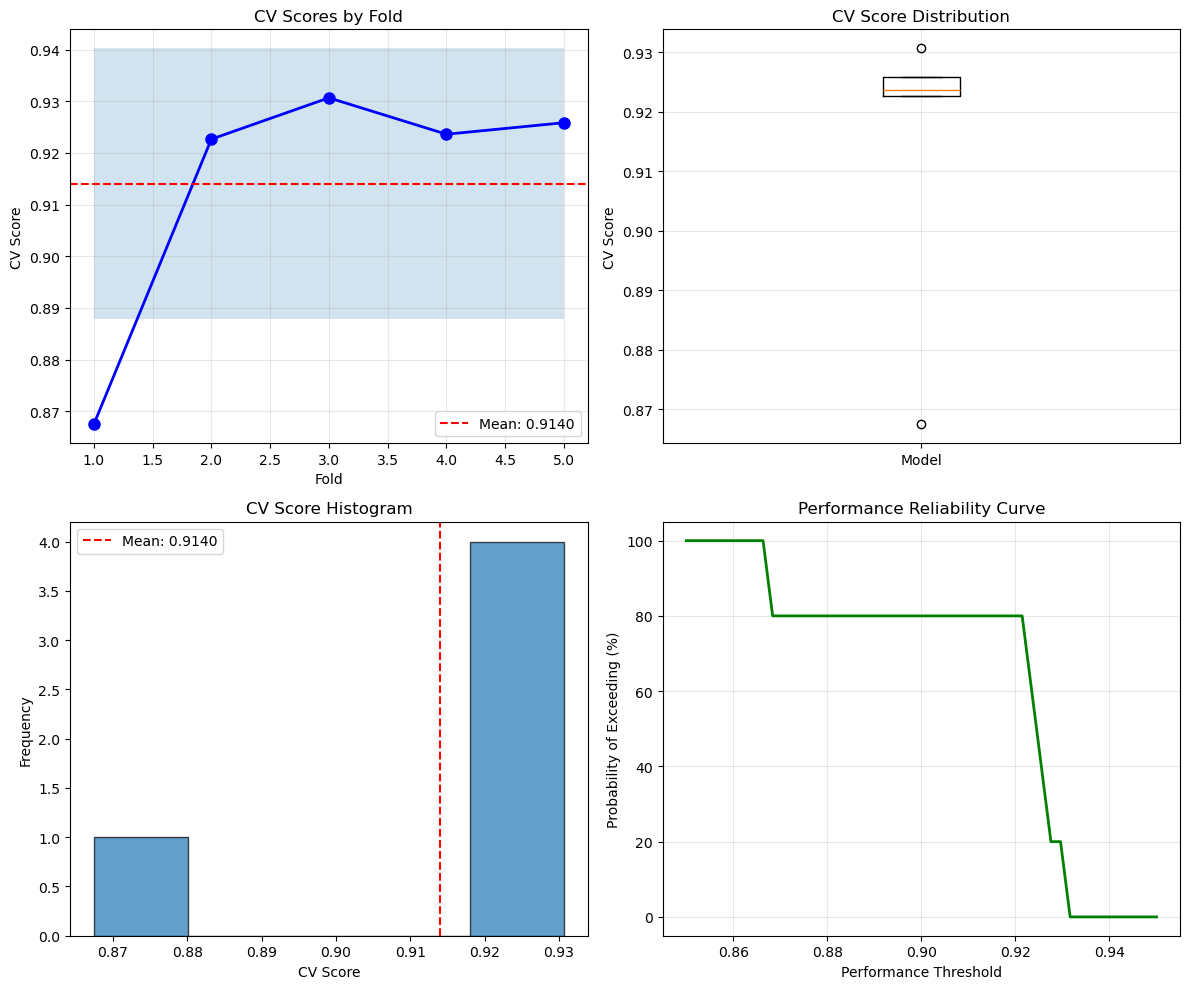

In [59]:
# 9. Visualization Code

import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# 1. Individual fold scores
ax1.plot(range(1, 6), cv_scores, 'bo-', linewidth=2, markersize=8)
ax1.axhline(y=np.mean(cv_scores), color='r', linestyle='--', label=f'Mean: {np.mean(cv_scores):.4f}')
ax1.fill_between(range(1, 6), np.mean(cv_scores) - np.std(cv_scores, ddof=1), 
                 np.mean(cv_scores) + np.std(cv_scores, ddof=1), alpha=0.2)
ax1.set_xlabel('Fold')
ax1.set_ylabel('CV Score')
ax1.set_title('CV Scores by Fold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Box plot
ax2.boxplot(cv_scores, labels=['Model'])
ax2.set_ylabel('CV Score')
ax2.set_title('CV Score Distribution')
ax2.grid(True, alpha=0.3)

# 3. Histogram
ax3.hist(cv_scores, bins=5, edgecolor='black', alpha=0.7)
ax3.axvline(np.mean(cv_scores), color='red', linestyle='--', label=f'Mean: {np.mean(cv_scores):.4f}')
ax3.set_xlabel('CV Score')
ax3.set_ylabel('Frequency')
ax3.set_title('CV Score Histogram')
ax3.legend()

# 4. Performance reliability
thresholds = np.linspace(0.85, 0.95, 50)
probabilities = [np.mean(cv_scores >= t) * 100 for t in thresholds]
ax4.plot(thresholds, probabilities, 'g-', linewidth=2)
ax4.set_xlabel('Performance Threshold')
ax4.set_ylabel('Probability of Exceeding (%)')
ax4.set_title('Performance Reliability Curve')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Resources
[Return To Top](#Contents)

**Dean De Cock paper and original data:**

- [Ames, Iowa: Alternative to the Boston Housing Data as an
End of Semester Regression Project](https://jse.amstat.org/v19n3/decock.pdf)

- [DataDocumentation.txt](https://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

- [Ames Data Dictionary on Github](https://github.com/Padre-Media/dataset/blob/main/Ames%20Data%20Dictionary.txt)